# EJEMPLO DE LO QUE HACE EL CODIGO


## USO DE LENTE CONVERGENTE

manejar una sola unidad (mm, cm, m), solo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen
Se está utilizando la función: __init__
Se está utilizando la función: magnificacion
La magnificación es: 2.0
Se está utilizando la función: grafica_lente_convergente
Se está utilizando la función: rayos_incidentes
Se está utilizando la función: rayos_emergentes

el foco del lente es: 10.0
 la altura del objeto: 4.0
 la posicion del objeto es: 5.0
 la imagen esta a -10.0
 altura de la imagen: 8.0



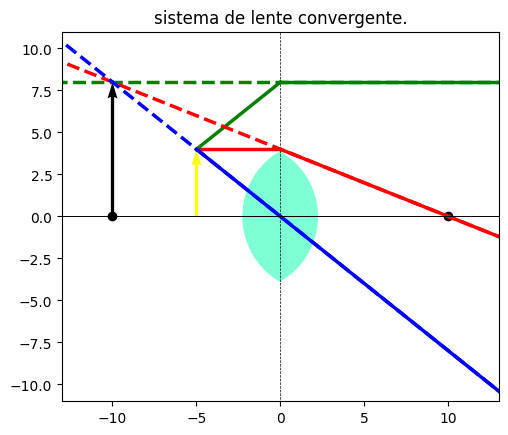

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def show_function_name(func):
    '''
    Este es un decorador que dice que funcion se esta ejecutando.
    '''
    def wrapper(*args, **kwargs):
        print(f"Se está utilizando la función: {func.__name__}")
        return func(*args, **kwargs)
    return wrapper

class Lentes:
    '''
    Esta es una clase que recibe por argumentos un diccionario con los valores de distancia del objeto, distancia de la imagen, distancia focal
    para asi calcular la magnificacion del lente usado, calcular el valor faltante en el diccionario ingresado y guardando métodos aprovechados 
    por otras subclases.
    '''

    def __init__(self, **kwargs):
        '''
        constructor de la clase Lentes, hace que esta reciba por argumento a un diccionario con los valores asociados al lente, ademas, dice que
        valor falta en el diccionario ingresado a través de un nuevo diccionario con los 3 valores de los cuales uno cualquiera es opcional.
        '''
        self.diccionario = kwargs
        
        opciones = {'f': 'foco', 'd': 'distancia de objeto', 'imagen': 'distancia imagen'}
        
        for clave, descripcion in opciones.items():
            if clave not in self.diccionario:
                print(f'Falta el valor de {descripcion}')
        
        if not any(opcion in self.diccionario for opcion in opciones):
            print('No se proporcionaron valores.')

    def calcular_faltante(self):
        '''
        define la variable faltante en el diccionario ingresado como argumento de la clase Lentes y la calcula, posteriormente da a los valores
        de h, f, d e imagen el valor numerico correspondiente y lo guarda en un diccionario.
        '''
        resultado = {}
        
        try:
            if 'f' not in self.diccionario:
                d = self.diccionario['d']
                imagen = self.diccionario['imagen']
                f = 1 / (1 / d + 1 / imagen)
                resultado['f'] = f
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'el foco es: {f}')
            
            if 'd' not in self.diccionario:
                f = self.diccionario['f']
                imagen = self.diccionario['imagen']
                d = (f * imagen) / (imagen - f)
                resultado['f'] = self.diccionario['f']
                resultado['d'] = d
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'El objeto está a: {d}')
            
            if 'imagen' not in self.diccionario:
                f = self.diccionario['f']
                d = self.diccionario['d']
                imagen = (f * d) / (d - f)
                resultado['f'] = self.diccionario['f']
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = imagen
                resultado['h'] = self.diccionario['h']
                print(f'la imagen esta a: {imagen}')
            
        except ZeroDivisionError:
            if 'd' not in self.diccionario:
                resultado['f'] = self.diccionario['f']
                resultado['d'] = 'oo'
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'El objeto está ubicado muy lejos del lente, ya que la imagen está ubicada en el foco: {f}')
            if 'imagen' not in self.diccionario:
                resultado['f'] = self.diccionario['f']
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = 0
                resultado['h'] = self.diccionario['h']
                print(f'La imagen está en el infinito ya que el objeto está en el foco: {d}')

        return resultado
    
    def magnificacion(self, diccionario):
        '''
        recibe como argumento un diccionario en el que estan TODOS los datos del lente (f, h, imagen, d) y calcula la magnificación
        del lente usado, posteriormente dependiendo de la distancia focal del lente ejecuta la grafica de un lente convergente
        o de uno divergente respectivamente.
        '''

        f = diccionario['f']
        d = diccionario['d']
        imagen = diccionario['imagen']
        h = diccionario['h']

        magnificacion = -imagen / d
        altura_imagen = h * magnificacion
        print(f'La magnificación es: {magnificacion}')

        if f>0:
            self.grafica_lente_convergente(f, d, h, imagen, altura_imagen)
        elif f<0:
            self.grafica_lente_divergente(f, d, h, imagen, altura_imagen)

    def rayos_incidentes(self, f, d, h,imagen):
        '''
        grafica los rayos que van desde el objeto a en un lente convergente con el uso de las distancia d, f, h, imagen.
        '''
        #rayo paralelo
        plt.plot([-abs(d), 0], [h, h], color = 'red', linewidth = 2.5)

        # pendiente del rayo que pasa por el foco
        x1, y1 = [-abs(d), -abs(f)], [h, 0]
        try:
            m_f = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_f=-500
            print('imagen en el infinito')

        # rayo que pasa por el foco
        x2 = [-abs(d), 0]
        y2 = [h, h + m_f * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='green', linewidth=2.5)

        # recta vertical en x=d
        x3 = [0,0]
        y3 = [-50, 50]
        plt.plot(x3, y3, color='k', linewidth=0.5, linestyle = '--')

        # cálculo de la intersección
        xi = 0
        yi = y2[0] + m_f * (xi - x2[0])
        interseccion = [xi, yi]

        # pendiente de la recta que pasa por el centro
        x1, y1 = [0, d], [h, 0]
        try:
            m_c = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_c = float('inf')
            print('Pendiente infinita')

        # recta que pasa por el centro
        x2 = [-d, 0]
        y2 = [h, h + m_c * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='blue', linewidth=2.5)
        
        #punto focal
        plt.plot(-abs(f), 0, marker = 'o', color = 'k')
        plt.plot(abs(f), 0, marker = 'o', color = 'k')

        # vector de altura h ubicado en el origen
        plt.quiver(-abs(d), 0, 0, h, angles='xy', scale_units='xy', scale=1, color='yellow')

        #agrego rayos emergentes
        self.rayos_emergentes(f, d, h, imagen, interseccion, m_c)

        plt.show()

    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        grafica los rayos que van desde la lente a la imagen del objeto con el uso de las distancia d, f, h, imagen.
        '''
        #rayo que pasa por el foco emerge paralelo
        plt.plot([0, d+100], [list[1], list[1]], color = 'green', linewidth = 2.5)

        #proyeccion del rayo que pasa por el foco emerge paralelo
        plt.plot([-200, 200], [list[1], list[1]], color = 'green', linewidth = 2.5, linestyle = '--')
        
        # pendiente del rayo que emerge por el foco
        x1, y1 = [0, f], [h, 0]
        try:
            m = -(y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m=-500
            print('imagen en el infinito')

        # rayo que emerge por el foco
        x2 = [0, d + 50]
        y2 = [h, h - m * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='red', linewidth=2.5)

        # proyeccion del rayo que emerge por el foco
        x4 = [-200, 200]
        y4 = [h - m * (x4[0]), h - m * (x4[1])]
        plt.plot(x4, y4, color='red', linewidth=2.5, linestyle = '--')

        # rayo que emerge por el centro
        x_c= [0, d+50]
        y_c = [0, m_centro * (x_c[1] - x_c[0])]
        plt.plot(x_c, y_c, color='blue', linewidth=2.5)
        
        # proyeccion de el rayo que emerge por el centro
        x5 = [-200, 200]
        y5 = [ m_centro * (x5[0]), 0 + m_centro * (x5[1])]
        plt.plot(x5, y5, color='blue', linewidth=2.5, linestyle = '--')

        # Ecuación de la línea que emerge por el foco
        m1 = (y4[1] - y4[0]) / (x4[1] - x4[0])
        b1 = y4[0] - m1 * x4[0]

        # Ecuación del rayo que emerge por el centro
        m2 = (y5[1] - y5[0]) / (x5[1] - x5[0])
        b2 = y5[0] - m2 * x5[0]

        # Resolviendo para x
        try:
            x_intersect = (b2 - b1) / (m1 - m2)
            # Resolviendo para y
            y_intersect = m1 * x_intersect + b1

        except ZeroDivisionError:
            x_intersect = 0
            # Resolviendo para y
            y_intersect = 0

        #vector altura de la imagen
        plt.quiver(x_intersect, 0, 0, y_intersect, angles='xy', scale_units='xy', scale=1)
        print(f'\nel foco del lente es: {f}\n',f'la altura del objeto: {h}\n',f'la posicion del objeto es: {d}\n',f'la imagen esta a {imagen}\n'if imagen !=0 else 'la imagen esta en el infinito\n',f'altura de la imagen: {y_intersect}\n' if y_intersect != 0 else '\n') 

        #punto focal
        plt.show()

class LenteDivergente(Lentes):
    '''
    Es una subclase de la clase Lentes, de la cual hereda el constructor y los métodos: calcular faltante, magnificación y rayos incidentes. Es una clase
    dirigida a los lentes divergentes y el gráfico de un sistema en el que se calcula la distancia faltante en el diccionario ingresado como argumento.
    '''
    @show_function_name
    def __init__(self, **kwargs):
        '''
        constructor heredado de la clase Lentes hace que la clase reciba un diccionario y diga que valor falto.
        '''
        super().__init__(**kwargs)
        self.list = []

    @show_function_name
    def calcular_faltante(self):
        '''
        metodo heredado de la clase Lentes, clacula la variable faltante en el diccionario ingresado y retorna TODOS los valores en un diccionario.
        '''
        return super().calcular_faltante()
    
    @show_function_name
    def magnificacion(self, diccionario):
        ''' 
        metodo heredado de la clase Lentes, calcula la magnificacion del lente usado y ejecuta la graficacion de un lente convergente o divergente
        respectivamente.
        '''
        return super().magnificacion(diccionario)
    
    @show_function_name
    def grafica_lente_divergente(self, f, d, h, imagen, altura_imagen):
        '''
        Crea un espacio en el cual se graficaran los métodos rayos_incidentes y rayos_emergentes, ademas, agrega una imagen construida a partir de 
        circunferencias y un cuadrado de una lente delgada divergente.
        '''
        fig, ax = plt.subplots()

        # Crear Wedges
        div = 7
        R = (4*(6**2+5**2)**(1/2))/div
        wedge_1 = mpatches.Wedge((-R-0.5, 0), R, 0, 360, color='white')
        wedge_2 = mpatches.Wedge((R+0.5, 0), R, 0, 360, color='white')

        #crear cuadrado
        cuadrado_1 = plt.Polygon([[-3.85,-3.85], [-3.85,3.85], [3.85,3.85], [3.85,-3.85]], color = 'blue', alpha = 0.6)

        # Agregar el Wedge al gráfico
        ax.add_patch(cuadrado_1)
        ax.add_patch(wedge_1)
        ax.add_patch(wedge_2)

        # Agregar las líneas con alto valor de zorder
        # plt.axvline(x=0, color='k', zorder=10, linewidth=0.7)  # Línea vertical
        plt.axhline(y=0, color='k', zorder=10, linewidth=0.7)  # Línea horizontal

        #escala
        # ax.autoscale(tight=True)
        ax.set_aspect('equal')  # Para asegurar que se grafique simetricamente
        plt.title('sistema de lente divergente.')

        if d > 4*h :
            ax.set_xlim(-5-abs(f) , 5+abs(f))
        else:
            ax.set_xlim(-3-abs(imagen) if abs(imagen)+1 > abs(d) else -3-abs(d)  , 3+abs(imagen) if abs(imagen) > abs(d) else 3+abs(d)) if abs(imagen) <= 3*abs(h) else ax.set_xlim(-3-abs(d),3+abs(d)) 
        
        ax.set_ylim(-abs(h)-3 if abs(altura_imagen) < h else -3-abs(altura_imagen)  , abs(h)+3 if abs(altura_imagen) < h else 3+abs(altura_imagen)) if abs(altura_imagen)<=3*abs(imagen) else ax.set_ylim(-h-2, h+2)
    
        #agrego los rayos
        self.rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_incidentes(self, f, d, h,imagen):
        '''
        gráfica los tres rayos principales que salen de el obljeto en el espacio generado por el método grafica_lente_divergente, los rayos 
        inician de el objeto y finalizan en el lente
        '''
        #rayo paralelo
        plt.plot([-abs(d), 0], [h, h], color = 'red', linewidth = 2.5)

        # pendiente del rayo que pasa por el foco
        x1, y1 = [-abs(d), abs(f)], [h, 0]
        try:
            m_f = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_f=-500
            print('imagen en el infinito')

        # rayo que pasa por el foco
        x2 = [-abs(d), 0]
        y2 = [h, h + m_f * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='green', linewidth=2.5)

        # recta vertical en x=d
        x3 = [0,0]
        y3 = [-50, 50]
        plt.plot(x3, y3, color='k', linewidth=0.5, linestyle = '--')

        # cálculo de la intersección
        xi = 0
        yi = y2[0] + m_f * (xi - x2[0])
        interseccion = [xi, yi]

        # pendiente de la recta que pasa por el centro
        x1, y1 = [0, d], [h, 0]
        try:
            m_c = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_c = float('inf')
            print('Pendiente infinita')

        # recta que pasa por el centro
        x2 = [-d, 0]
        y2 = [h, h + m_c * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='blue', linewidth=2.5)
        
        #punto focal
        plt.plot(-abs(f), 0, marker = 'o', color = 'k')
        plt.plot(abs(f), 0, marker = 'o', color = 'k')

        # vector de altura h ubicado en el origen
        plt.quiver(-abs(d), 0, 0, h, angles='xy', scale_units='xy', scale=1, color='yellow')

        #agrego rayos emergentes
        self.rayos_emergentes(f, d, h, imagen, interseccion, m_c)
        plt.show()
    @show_function_name
    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        metodo heredado de la clase Lentes gráfica los tres rayos principales que salen de el lente en el espacio generado por el método
        grafica_lente_divergente, los rayos inician de el lente y finalizan en la imagen o en el infinito respectivamente.
        '''
        return super().rayos_emergentes(f, d, h, imagen, list, m_centro)

class LenteConvergente(Lentes):
    '''
    Es una subclase de la clase Lentes, de la cual hereda el constructor y los métodos: calcular faltante, magnificación y rayos incidentes. Es una clase
    dirigida a los lentes convergentes y al gráfico de un sistema en el que se calcula la distancia faltante en el diccionario ingresado como argumento.
    '''
    @show_function_name
    def __init__(self, **kwargs):
        '''
        constructor heredado de la clase Lentes hace que la clase reciba un diccionario y diga que valor falto.
        '''
        super().__init__(**kwargs)
        self.list = []
    @show_function_name
    def calcular_faltante(self):
        '''
        metodo heredado de la clase Lentes, clacula la variable faltante en el diccionario ingresado y retorna TODOS los valores en un diccionario.
        '''
        resultado = super().calcular_faltante()
        self.magnificacion(resultado)
        return resultado
    @show_function_name
    def magnificacion(self, diccionario):
        ''' 
        metodo heredado de la clase Lentes, calcula la magnificacion del lente usado y ejecuta la graficacion de un lente convergente o divergente
        respectivamente.
        '''
        return super().magnificacion(diccionario)
    @show_function_name
    def grafica_lente_convergente(self,f, d, h, imagen, altura_imagen):
        '''
        Crea un espacio en el cual se graficaran los métodos rayos_incidentes y rayos_emergentes, ademas, agrega una imagen construida a partir de 
        circunferencias de una lente delgada divergente.
        '''
        fig, ax = plt.subplots()
        # Crear Wedges{cuñás}
        div = 7
        R = (4*(6**2+5**2)**(1/2))/div
        wedge_1 = mpatches.Wedge((-(R/2), 0), R, 0, 360, color='magenta', alpha = 0)
        wedge_2 = mpatches.Wedge(((R/2), 0), R, 0, 360, color='aquamarine')
        
        # Agregar el Wedge al gráfico
        ax.add_patch(wedge_1)
        ax.add_patch(wedge_2)

        # Agregar las líneas con alto valor de zorder
        # plt.axvline(x=0, color='k', zorder=10)  # Línea vertical
        plt.axhline(y=0, color='k', zorder=10, linewidth=0.7)  # Línea horizontal

        # Recortar una cuña con la otra para mostrar la intersección
        wedge_2.set_clip_path(wedge_1)
        
        #escala
        # ax.autoscale(tight=True)
        ax.set_aspect('equal')  # Para asegurar que se grafique simetricamente
        plt.title('sistema de lente convergente.')

        if d > 4*h :
            ax.set_xlim(-5-abs(f) , 5+abs(f))
        else:
            ax.set_xlim(-3-abs(imagen) if abs(imagen)+1 > abs(d) else -3-abs(d)  , 3+abs(imagen) if abs(imagen) > abs(d) else 3+abs(d)) if abs(imagen) <= 3*abs(h) else ax.set_xlim(-3-abs(d),3+abs(d)) 
        
        ax.set_ylim(-abs(h)-3 if abs(altura_imagen) < h else -3-abs(altura_imagen)  , abs(h)+3 if abs(altura_imagen) < h else 3+abs(altura_imagen)) if abs(altura_imagen)<=3*abs(imagen) else ax.set_ylim(-h-2, h+2)
    
        #agrego los rayos
        self.rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_incidentes(self, f, d, h, imagen):
        '''
        método heredado de la clase Lentes, grafica los rayos que van desde el objeto a en un lente convergente con el uso
        de las distancia d, f, h, imagen.
        '''
        return super().rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        método heredado de la clase Lentes, grafica los rayos que van desde la lente convergente a la imagen del objeto con el uso 
        de las distancia d, f, h, imagen.
        '''
        return super().rayos_emergentes(f, d, h, imagen, list, m_centro)

# @show_function_name
# def valor_faltante():
#     '''
#     asocia los valores de una lista de tuplas a traves de un ciclo for para guardar de forma ordenada los valores dedistancia 
#     focal, distancia objeto, distancia imagen y altura del objeto en un diccionario.
#     '''
#     diccionario = {}
#     print('manejar una sola unidad (mm, cm, m) \nsolo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen\n\n')

#     opciones = [('f', 'Ingrese el foco del lente (deje en blanco si falta): '),
#                ('d', 'Ingrese la distancia del lente al objeto (deje en blanco si falta): '),
#                ('imagen', 'Ingrese la imagen del objeto (deje en blanco si falta): '), 
#                ('h','Ingrese la altura del objeto: ')]

#     for clave, mensaje in opciones:
#         while True:
#             valor = input(mensaje)
#             if valor:
#                 try:
#                     diccionario[clave] = float(valor)
#                     break
#                 except ValueError:
#                     print('Ingrese un valor numérico válido.')
#             else:
#                 break
    
#     return diccionario

# se usara la siguiente seccion de codigo para la presentación

def valor_faltante():
    diccionario = {}
    print('manejar una sola unidad (mm, cm, m), solo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen')
    try:
        f = 10#input('ingrese el foco del lente (deje en blanco si falta):\n')
        if f:
            diccionario['f'] = float(f)
        d = 5#input('ingrese la distancia del lente al objeto (deje en blanco si falta):\n')
        if d:
            diccionario['d'] = abs(float(d))
        imagen = -10#input('ingrese la distancia de la imagen al objeto (deje en blanco si falta):\n')
        if imagen:
            diccionario['imagen'] = float(imagen)
        h = 4#input('ingrese la altura del objeto (deje en blanco si falta):\n')
        if h:
            diccionario['h'] = float(h)
        return diccionario
    except ValueError:
        print('Ingrese valores válidos')
        return valor_faltante()

diccionario = valor_faltante()
lente = LenteConvergente(**diccionario) if diccionario['f'] > 0 else LenteDivergente(**diccionario)
if len(diccionario) == 3:
    lente.calcular_faltante()
elif len(diccionario) == 4:
    lente.magnificacion(diccionario)
else:
    print('error, se necesitan minimo dos 3 datos para la ejecucion del programa')

## USO DE LENTE DIVERGENTE


manejar una sola unidad (mm, cm, m), solo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen
Se está utilizando la función: __init__
Se está utilizando la función: magnificacion
La magnificación es: 2.0
Se está utilizando la función: grafica_lente_divergente
Se está utilizando la función: rayos_incidentes
Se está utilizando la función: rayos_emergentes

el foco del lente es: -10.0
 la altura del objeto: 4.0
 la posicion del objeto es: 5.0
 la imagen esta a -10.0
 altura de la imagen: 2.666666666666667



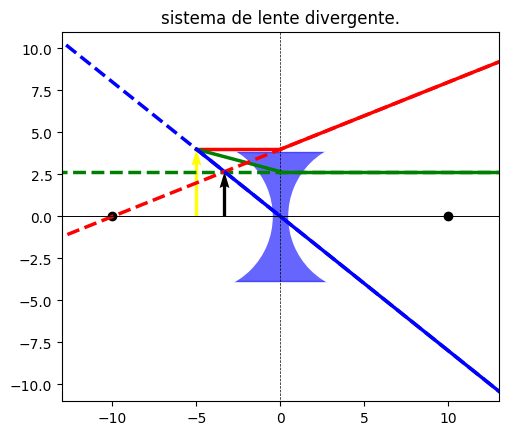

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def show_function_name(func):
    '''
    Este es un decorador que dice que funcion se esta ejecutando.
    '''
    def wrapper(*args, **kwargs):
        print(f"Se está utilizando la función: {func.__name__}")
        return func(*args, **kwargs)
    return wrapper

class Lentes:
    '''
    Esta es una clase que recibe por argumentos un diccionario con los valores de distancia del objeto, distancia de la imagen, distancia focal
    para asi calcular la magnificacion del lente usado, calcular el valor faltante en el diccionario ingresado y guardando métodos aprovechados 
    por otras subclases.
    '''

    def __init__(self, **kwargs):
        '''
        constructor de la clase Lentes, hace que esta reciba por argumento a un diccionario con los valores asociados al lente, ademas, dice que
        valor falta en el diccionario ingresado a través de un nuevo diccionario con los 3 valores de los cuales uno cualquiera es opcional.
        '''
        self.diccionario = kwargs
        
        opciones = {'f': 'foco', 'd': 'distancia de objeto', 'imagen': 'distancia imagen'}
        
        for clave, descripcion in opciones.items():
            if clave not in self.diccionario:
                print(f'Falta el valor de {descripcion}')
        
        if not any(opcion in self.diccionario for opcion in opciones):
            print('No se proporcionaron valores.')

    def calcular_faltante(self):
        '''
        define la variable faltante en el diccionario ingresado como argumento de la clase Lentes y la calcula, posteriormente da a los valores
        de h, f, d e imagen el valor numerico correspondiente y lo guarda en un diccionario.
        '''
        resultado = {}
        
        try:
            if 'f' not in self.diccionario:
                d = self.diccionario['d']
                imagen = self.diccionario['imagen']
                f = 1 / (1 / d + 1 / imagen)
                resultado['f'] = f
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'el foco es: {f}')
            
            if 'd' not in self.diccionario:
                f = self.diccionario['f']
                imagen = self.diccionario['imagen']
                d = (f * imagen) / (imagen - f)
                resultado['f'] = self.diccionario['f']
                resultado['d'] = d
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'El objeto está a: {d}')
            
            if 'imagen' not in self.diccionario:
                f = self.diccionario['f']
                d = self.diccionario['d']
                imagen = (f * d) / (d - f)
                resultado['f'] = self.diccionario['f']
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = imagen
                resultado['h'] = self.diccionario['h']
                print(f'la imagen esta a: {imagen}')
            
        except ZeroDivisionError:
            if 'd' not in self.diccionario:
                resultado['f'] = self.diccionario['f']
                resultado['d'] = 'oo'
                resultado['imagen'] = self.diccionario['imagen']
                resultado['h'] = self.diccionario['h']
                print(f'El objeto está ubicado muy lejos del lente, ya que la imagen está ubicada en el foco: {f}')
            if 'imagen' not in self.diccionario:
                resultado['f'] = self.diccionario['f']
                resultado['d'] = self.diccionario['d']
                resultado['imagen'] = 0
                resultado['h'] = self.diccionario['h']
                print(f'La imagen está en el infinito ya que el objeto está en el foco: {d}')

        return resultado
    
    def magnificacion(self, diccionario):
        '''
        recibe como argumento un diccionario en el que estan TODOS los datos del lente (f, h, imagen, d) y calcula la magnificación
        del lente usado, posteriormente dependiendo de la distancia focal del lente ejecuta la grafica de un lente convergente
        o de uno divergente respectivamente.
        '''

        f = diccionario['f']
        d = diccionario['d']
        imagen = diccionario['imagen']
        h = diccionario['h']

        magnificacion = -imagen / d
        altura_imagen = h * magnificacion
        print(f'La magnificación es: {magnificacion}')

        if f>0:
            self.grafica_lente_convergente(f, d, h, imagen, altura_imagen)
        elif f<0:
            self.grafica_lente_divergente(f, d, h, imagen, altura_imagen)

    def rayos_incidentes(self, f, d, h,imagen):
        '''
        grafica los rayos que van desde el objeto a en un lente convergente con el uso de las distancia d, f, h, imagen.
        '''
        #rayo paralelo
        plt.plot([-abs(d), 0], [h, h], color = 'red', linewidth = 2.5)

        # pendiente del rayo que pasa por el foco
        x1, y1 = [-abs(d), -abs(f)], [h, 0]
        try:
            m_f = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_f=-500
            print('imagen en el infinito')

        # rayo que pasa por el foco
        x2 = [-abs(d), 0]
        y2 = [h, h + m_f * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='green', linewidth=2.5)

        # recta vertical en x=d
        x3 = [0,0]
        y3 = [-50, 50]
        plt.plot(x3, y3, color='k', linewidth=0.5, linestyle = '--')

        # cálculo de la intersección
        xi = 0
        yi = y2[0] + m_f * (xi - x2[0])
        interseccion = [xi, yi]

        # pendiente de la recta que pasa por el centro
        x1, y1 = [0, d], [h, 0]
        try:
            m_c = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_c = float('inf')
            print('Pendiente infinita')

        # recta que pasa por el centro
        x2 = [-d, 0]
        y2 = [h, h + m_c * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='blue', linewidth=2.5)
        
        #punto focal
        plt.plot(-abs(f), 0, marker = 'o', color = 'k')
        plt.plot(abs(f), 0, marker = 'o', color = 'k')

        # vector de altura h ubicado en el origen
        plt.quiver(-abs(d), 0, 0, h, angles='xy', scale_units='xy', scale=1, color='yellow')

        #agrego rayos emergentes
        self.rayos_emergentes(f, d, h, imagen, interseccion, m_c)

        plt.show()

    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        grafica los rayos que van desde la lente a la imagen del objeto con el uso de las distancia d, f, h, imagen.
        '''
        #rayo que pasa por el foco emerge paralelo
        plt.plot([0, d+100], [list[1], list[1]], color = 'green', linewidth = 2.5)

        #proyeccion del rayo que pasa por el foco emerge paralelo
        plt.plot([-200, 200], [list[1], list[1]], color = 'green', linewidth = 2.5, linestyle = '--')
        
        # pendiente del rayo que emerge por el foco
        x1, y1 = [0, f], [h, 0]
        try:
            m = -(y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m=-500
            print('imagen en el infinito')

        # rayo que emerge por el foco
        x2 = [0, d + 50]
        y2 = [h, h - m * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='red', linewidth=2.5)

        # proyeccion del rayo que emerge por el foco
        x4 = [-200, 200]
        y4 = [h - m * (x4[0]), h - m * (x4[1])]
        plt.plot(x4, y4, color='red', linewidth=2.5, linestyle = '--')

        # rayo que emerge por el centro
        x_c= [0, d+50]
        y_c = [0, m_centro * (x_c[1] - x_c[0])]
        plt.plot(x_c, y_c, color='blue', linewidth=2.5)
        
        # proyeccion de el rayo que emerge por el centro
        x5 = [-200, 200]
        y5 = [ m_centro * (x5[0]), 0 + m_centro * (x5[1])]
        plt.plot(x5, y5, color='blue', linewidth=2.5, linestyle = '--')

        # Ecuación de la línea que emerge por el foco
        m1 = (y4[1] - y4[0]) / (x4[1] - x4[0])
        b1 = y4[0] - m1 * x4[0]

        # Ecuación del rayo que emerge por el centro
        m2 = (y5[1] - y5[0]) / (x5[1] - x5[0])
        b2 = y5[0] - m2 * x5[0]

        # Resolviendo para x
        try:
            x_intersect = (b2 - b1) / (m1 - m2)
            # Resolviendo para y
            y_intersect = m1 * x_intersect + b1

        except ZeroDivisionError:
            x_intersect = 0
            # Resolviendo para y
            y_intersect = 0

        #vector altura de la imagen
        plt.quiver(x_intersect, 0, 0, y_intersect, angles='xy', scale_units='xy', scale=1)
        print(f'\nel foco del lente es: {f}\n',f'la altura del objeto: {h}\n',f'la posicion del objeto es: {d}\n',f'la imagen esta a {imagen}\n'if imagen !=0 else 'la imagen esta en el infinito\n',f'altura de la imagen: {y_intersect}\n' if y_intersect != 0 else '\n') 

        #punto focal
        plt.show()

class LenteDivergente(Lentes):
    '''
    Es una subclase de la clase Lentes, de la cual hereda el constructor y los métodos: calcular faltante, magnificación y rayos incidentes. Es una clase
    dirigida a los lentes divergentes y el gráfico de un sistema en el que se calcula la distancia faltante en el diccionario ingresado como argumento.
    '''
    @show_function_name
    def __init__(self, **kwargs):
        '''
        constructor heredado de la clase Lentes hace que la clase reciba un diccionario y diga que valor falto.
        '''
        super().__init__(**kwargs)
        self.list = []

    @show_function_name
    def calcular_faltante(self):
        '''
        metodo heredado de la clase Lentes, clacula la variable faltante en el diccionario ingresado y retorna TODOS los valores en un diccionario.
        '''
        return super().calcular_faltante()
    
    @show_function_name
    def magnificacion(self, diccionario):
        ''' 
        metodo heredado de la clase Lentes, calcula la magnificacion del lente usado y ejecuta la graficacion de un lente convergente o divergente
        respectivamente.
        '''
        return super().magnificacion(diccionario)
    
    @show_function_name
    def grafica_lente_divergente(self, f, d, h, imagen, altura_imagen):
        '''
        Crea un espacio en el cual se graficaran los métodos rayos_incidentes y rayos_emergentes, ademas, agrega una imagen construida a partir de 
        circunferencias y un cuadrado de una lente delgada divergente.
        '''
        fig, ax = plt.subplots()

        # Crear Wedges
        div = 7
        R = (4*(6**2+5**2)**(1/2))/div
        wedge_1 = mpatches.Wedge((-R-0.5, 0), R, 0, 360, color='white')
        wedge_2 = mpatches.Wedge((R+0.5, 0), R, 0, 360, color='white')

        #crear cuadrado
        cuadrado_1 = plt.Polygon([[-3.85,-3.85], [-3.85,3.85], [3.85,3.85], [3.85,-3.85]], color = 'blue', alpha = 0.6)

        # Agregar el Wedge al gráfico
        ax.add_patch(cuadrado_1)
        ax.add_patch(wedge_1)
        ax.add_patch(wedge_2)

        # Agregar las líneas con alto valor de zorder
        # plt.axvline(x=0, color='k', zorder=10, linewidth=0.7)  # Línea vertical
        plt.axhline(y=0, color='k', zorder=10, linewidth=0.7)  # Línea horizontal

        #escala
        # ax.autoscale(tight=True)
        ax.set_aspect('equal')  # Para asegurar que se grafique simetricamente
        plt.title('sistema de lente divergente.')

        if d > 4*h :
            ax.set_xlim(-5-abs(f) , 5+abs(f))
        else:
            ax.set_xlim(-3-abs(imagen) if abs(imagen)+1 > abs(d) else -3-abs(d)  , 3+abs(imagen) if abs(imagen) > abs(d) else 3+abs(d)) if abs(imagen) <= 3*abs(h) else ax.set_xlim(-3-abs(d),3+abs(d)) 
        
        ax.set_ylim(-abs(h)-3 if abs(altura_imagen) < h else -3-abs(altura_imagen)  , abs(h)+3 if abs(altura_imagen) < h else 3+abs(altura_imagen)) if abs(altura_imagen)<=3*abs(imagen) else ax.set_ylim(-h-2, h+2)
    
        #agrego los rayos
        self.rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_incidentes(self, f, d, h,imagen):
        '''
        gráfica los tres rayos principales que salen de el obljeto en el espacio generado por el método grafica_lente_divergente, los rayos 
        inician de el objeto y finalizan en el lente
        '''
        #rayo paralelo
        plt.plot([-abs(d), 0], [h, h], color = 'red', linewidth = 2.5)

        # pendiente del rayo que pasa por el foco
        x1, y1 = [-abs(d), abs(f)], [h, 0]
        try:
            m_f = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_f=-500
            print('imagen en el infinito')

        # rayo que pasa por el foco
        x2 = [-abs(d), 0]
        y2 = [h, h + m_f * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='green', linewidth=2.5)

        # recta vertical en x=d
        x3 = [0,0]
        y3 = [-50, 50]
        plt.plot(x3, y3, color='k', linewidth=0.5, linestyle = '--')

        # cálculo de la intersección
        xi = 0
        yi = y2[0] + m_f * (xi - x2[0])
        interseccion = [xi, yi]

        # pendiente de la recta que pasa por el centro
        x1, y1 = [0, d], [h, 0]
        try:
            m_c = (y1[1] - y1[0]) / (x1[1] - x1[0])
        except ZeroDivisionError:
            m_c = float('inf')
            print('Pendiente infinita')

        # recta que pasa por el centro
        x2 = [-d, 0]
        y2 = [h, h + m_c * (x2[1] - x2[0])]
        plt.plot(x2, y2, color='blue', linewidth=2.5)
        
        #punto focal
        plt.plot(-abs(f), 0, marker = 'o', color = 'k')
        plt.plot(abs(f), 0, marker = 'o', color = 'k')

        # vector de altura h ubicado en el origen
        plt.quiver(-abs(d), 0, 0, h, angles='xy', scale_units='xy', scale=1, color='yellow')

        #agrego rayos emergentes
        self.rayos_emergentes(f, d, h, imagen, interseccion, m_c)
        plt.show()
    @show_function_name
    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        metodo heredado de la clase Lentes gráfica los tres rayos principales que salen de el lente en el espacio generado por el método
        grafica_lente_divergente, los rayos inician de el lente y finalizan en la imagen o en el infinito respectivamente.
        '''
        return super().rayos_emergentes(f, d, h, imagen, list, m_centro)

class LenteConvergente(Lentes):
    '''
    Es una subclase de la clase Lentes, de la cual hereda el constructor y los métodos: calcular faltante, magnificación y rayos incidentes. Es una clase
    dirigida a los lentes convergentes y al gráfico de un sistema en el que se calcula la distancia faltante en el diccionario ingresado como argumento.
    '''
    @show_function_name
    def __init__(self, **kwargs):
        '''
        constructor heredado de la clase Lentes hace que la clase reciba un diccionario y diga que valor falto.
        '''
        super().__init__(**kwargs)
        self.list = []
    @show_function_name
    def calcular_faltante(self):
        '''
        metodo heredado de la clase Lentes, clacula la variable faltante en el diccionario ingresado y retorna TODOS los valores en un diccionario.
        '''
        resultado = super().calcular_faltante()
        self.magnificacion(resultado)
        return resultado
    @show_function_name
    def magnificacion(self, diccionario):
        ''' 
        metodo heredado de la clase Lentes, calcula la magnificacion del lente usado y ejecuta la graficacion de un lente convergente o divergente
        respectivamente.
        '''
        return super().magnificacion(diccionario)
    @show_function_name
    def grafica_lente_convergente(self,f, d, h, imagen, altura_imagen):
        '''
        Crea un espacio en el cual se graficaran los métodos rayos_incidentes y rayos_emergentes, ademas, agrega una imagen construida a partir de 
        circunferencias de una lente delgada divergente.
        '''
        fig, ax = plt.subplots()
        # Crear Wedges{cuñás}
        div = 7
        R = (4*(6**2+5**2)**(1/2))/div
        wedge_1 = mpatches.Wedge((-(R/2), 0), R, 0, 360, color='magenta', alpha = 0)
        wedge_2 = mpatches.Wedge(((R/2), 0), R, 0, 360, color='aquamarine')
        
        # Agregar el Wedge al gráfico
        ax.add_patch(wedge_1)
        ax.add_patch(wedge_2)

        # Agregar las líneas con alto valor de zorder
        # plt.axvline(x=0, color='k', zorder=10)  # Línea vertical
        plt.axhline(y=0, color='k', zorder=10, linewidth=0.7)  # Línea horizontal

        # Recortar una cuña con la otra para mostrar la intersección
        wedge_2.set_clip_path(wedge_1)
        
        #escala
        # ax.autoscale(tight=True)
        ax.set_aspect('equal')  # Para asegurar que se grafique simetricamente
        plt.title('sistema de lente convergente.')

        if d > 4*h :
            ax.set_xlim(-5-abs(f) , 5+abs(f))
        else:
            ax.set_xlim(-3-abs(imagen) if abs(imagen)+1 > abs(d) else -3-abs(d)  , 3+abs(imagen) if abs(imagen) > abs(d) else 3+abs(d)) if abs(imagen) <= 3*abs(h) else ax.set_xlim(-3-abs(d),3+abs(d)) 
        
        ax.set_ylim(-abs(h)-3 if abs(altura_imagen) < h else -3-abs(altura_imagen)  , abs(h)+3 if abs(altura_imagen) < h else 3+abs(altura_imagen)) if abs(altura_imagen)<=3*abs(imagen) else ax.set_ylim(-h-2, h+2)
    
        #agrego los rayos
        self.rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_incidentes(self, f, d, h, imagen):
        '''
        método heredado de la clase Lentes, grafica los rayos que van desde el objeto a en un lente convergente con el uso
        de las distancia d, f, h, imagen.
        '''
        return super().rayos_incidentes(f, d, h, imagen)
    @show_function_name
    def rayos_emergentes(self, f, d, h, imagen, list, m_centro):
        '''
        método heredado de la clase Lentes, grafica los rayos que van desde la lente convergente a la imagen del objeto con el uso 
        de las distancia d, f, h, imagen.
        '''
        return super().rayos_emergentes(f, d, h, imagen, list, m_centro)

# @show_function_name
# def valor_faltante():
#     '''
#     asocia los valores de una lista de tuplas a traves de un ciclo for para guardar de forma ordenada los valores dedistancia 
#     focal, distancia objeto, distancia imagen y altura del objeto en un diccionario.
#     '''
#     diccionario = {}
#     print('manejar una sola unidad (mm, cm, m) \nsolo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen\n\n')

#     opciones = [('f', 'Ingrese el foco del lente (deje en blanco si falta): '),
#                ('d', 'Ingrese la distancia del lente al objeto (deje en blanco si falta): '),
#                ('imagen', 'Ingrese la imagen del objeto (deje en blanco si falta): '), 
#                ('h','Ingrese la altura del objeto: ')]

#     for clave, mensaje in opciones:
#         while True:
#             valor = input(mensaje)
#             if valor:
#                 try:
#                     diccionario[clave] = float(valor)
#                     break
#                 except ValueError:
#                     print('Ingrese un valor numérico válido.')
#             else:
#                 break
    
#     return diccionario

# se usara la siguiente seccion de codigo para la presentación

def valor_faltante():
    diccionario = {}
    print('manejar una sola unidad (mm, cm, m), solo puede faltar uno de los tres datos foco, distancia de objeto, distancia de imagen')
    try:
        f = -10#input('ingrese el foco del lente (deje en blanco si falta):\n')
        if f:
            diccionario['f'] = float(f)
        d = 5#input('ingrese la distancia del lente al objeto (deje en blanco si falta):\n')
        if d:
            diccionario['d'] = abs(float(d))
        imagen = -10#input('ingrese la distancia de la imagen al objeto (deje en blanco si falta):\n')
        if imagen:
            diccionario['imagen'] = float(imagen)
        h = 4#input('ingrese la altura del objeto (deje en blanco si falta):\n')
        if h:
            diccionario['h'] = float(h)
        return diccionario
    except ValueError:
        print('Ingrese valores válidos')
        return valor_faltante()

diccionario = valor_faltante()
lente = LenteConvergente(**diccionario) if diccionario['f'] > 0 else LenteDivergente(**diccionario)
if len(diccionario) == 3:
    lente.calcular_faltante()
elif len(diccionario) == 4:
    lente.magnificacion(diccionario)
else:
    print('error, se necesitan minimo dos 3 datos para la ejecucion del programa')